## Install necessary libraries

In [0]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import BorderlineSMOTE
class_names = ['Anticipation','Availability','Belonging','Buying','Cause','Choice','Cleanliness','Competence','Confidence','Connection','Design','Effort','Encouragement','Enjoyment','Equality','Expertise','Flexibilty','Identity','Income','Informed','Integrates','Met Expectations','Missed Expectations','Nostalgia','Organised','Physicality','Price','Privacy','Progression','Quality','Recommendation','Reliabiltiy','Responsiveness','Results','Retention','Rewards','Safety','Savings','Simplicity','Therapeautic','Time']

## Sets a random seed so that the results can be replicated

In [0]:
np.random.seed(7569)

## Load the data
The original data has 43 classes which are imbalanced.

This loads the dataset file into a pandas dataframe and two ancillary columns are removed, the remaining columns have any missing values dropped, the text data is then changed to lower case, and then a sample of 5 is displayed



In [0]:
df_train = pd.read_csv('ClassificationTrainingData.csv', encoding = 'unicode_escape')
df_train = df_train.drop(['labelId', 'id'], axis = 1)
df_train.dropna(inplace=True)
df_train = df_train.sort_values('label')
df_train.text = df_train.text.str.lower()
df_train.sample(5)

,text,label
423,loved their time,Enjoyment
812,10/10 all around.,Quality
445,didnt enjoy it as much,Enjoyment
275,looks dated,Design
251,"she gets to meet new friends, making new friends",Connection


## Create and Display a Plot
The graph shows the distribution of data. It can be seen that the data is highty skewed towards "Enjoyment" and "Informed".

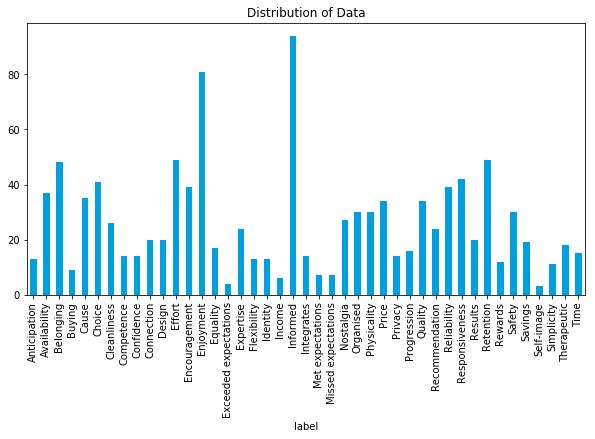

In [0]:
fig = plt.figure(figsize=(10,5))
df_train.groupby('label').text.count().plot.bar(ylim=0, color = '#009fdf', title='Distribution of Data')
plt.show()

fig.savefig("DisofData.png",bbox_inches='tight')
files.download("DisofData.png") 

## Create the Training and Testing Data
The below code is used when splitting a single dataset into training and testing

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_train['text'], df_train['label'],test_size=0.2, random_state = 7569)

# Algorithm Pipeline 
### Below is the pipelines which are used to train and test the algorithms

The pipelines below use a minimum document frequency of 2 and uses unigrams and bigrams for the TFIDF vectorisation

### Naive Nayes No Sampling Using TF-IDF

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                           pre       rec       spe        f1       geo       iba       sup

       Anticipation       0.00      0.00      1.00      0.00      0.00      0.00         2
       Availability       0.67      0.33      1.00      0.44      0.58      0.31         6
          Belonging       0.50      0.67      0.98      0.57      0.81      0.63         6
             Buying       0.00      0.00      1.00      0.00      0.00      0.00         2
              Cause       1.00      0.60      1.00      0.75      0.77      0.58         5
             Choice       0.50      0.22      0.99      0.31      0.47      0.20         9
        Cleanliness       1.00      0.50      1.00      0.67      0.71      0.48         4
         Competence       0.00      0.00      1.00      0.00      0.00      0.00         6
         Confidence       0.00      0.00      1.00      0.00      0.00      0.00         3
         Connection       0.00      0.00      1.00      0.00      0.00      0.00         

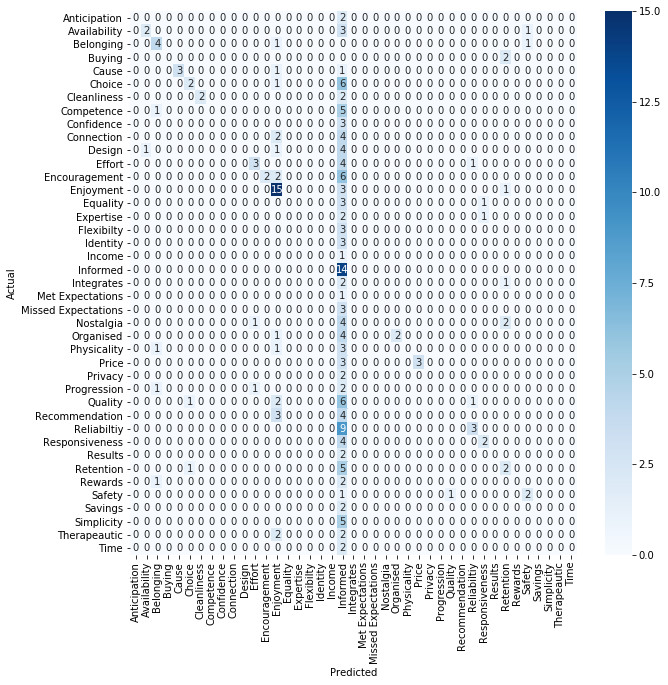

,Text,Predicted Label,Actual Label
39,"24 hour access, 24/7",Safety,Availability
1007,i feel the incentives are maybe a bit too high.,Belonging,Rewards
385,had a thoroughly enjoyable time.,Enjoyment,Enjoyment
821,this is in a different league,Choice,Quality
685,more prep needed,Informed,Organised


In [0]:
pipe = make_pipeline(TfidfVectorizer(max_df=0.95, min_df=2,
                                     ngram_range=(1, 2),
                                     stop_words = 'english'),
                     MultinomialNB())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

NoSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(NoSamp,
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("NoSampleNB.png",bbox_inches='tight')
files.download("NoSampleNB.png") 

df_comp_NB_NoSam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_NB_NoSam.Text = x_test
df_comp_NB_NoSam['Predicted Label'] = y_pred
df_comp_NB_NoSam['Actual Label'] = y_test
df_comp_NB_NoSam.sample(5)

### Random Forest No Sampling Using TF-IDF

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                           pre       rec       spe        f1       geo       iba       sup

       Anticipation       0.00      0.00      1.00      0.00      0.00      0.00         2
       Availability       0.33      0.17      0.99      0.22      0.41      0.15         6
          Belonging       0.50      0.33      0.99      0.40      0.57      0.31         6
             Buying       0.00      0.00      1.00      0.00      0.00      0.00         2
              Cause       0.00      0.00      1.00      0.00      0.00      0.00         5
             Choice       1.00      0.11      1.00      0.20      0.33      0.10         9
        Cleanliness       1.00      0.50      1.00      0.67      0.71      0.48         4
         Competence       0.00      0.00      1.00      0.00      0.00      0.00         6
         Confidence       0.00      0.00      1.00      0.00      0.00      0.00         3
         Connection       0.00      0.00      1.00      0.00      0.00      0.00         

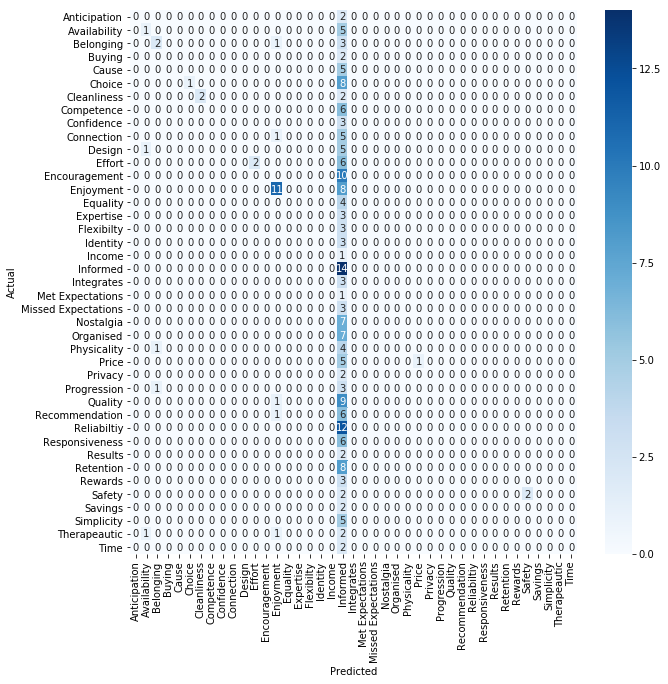

,Text,Predicted Label,Actual Label
806,failed on me,Informed,Quality
1014,earned reward points,Informed,Rewards
339,good luck to everyone taking part today,Informed,Encouragement
115,raise more money,Informed,Cause
222,could have done more than,Informed,Competence


In [0]:
pipe = make_pipeline(TfidfVectorizer(max_df=0.95, min_df=2,
                                     ngram_range=(1, 2),
                                     stop_words = 'english'),
                     RandomForestClassifier(n_estimators=200, max_depth=5, random_state=7569))

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

NoSamp = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(NoSamp,
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("NoSampleRF.png",bbox_inches='tight')
files.download("NoSampleRF.png")

df_comp_RF_NoSam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_RF_NoSam.Text = x_test
df_comp_RF_NoSam['Predicted Label'] = y_pred
df_comp_RF_NoSam['Actual Label'] = y_test
df_comp_RF_NoSam.sample(5)

### SVM No Sampling Using TF-IDF

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                           pre       rec       spe        f1       geo       iba       sup

       Anticipation       0.00      0.00      1.00      0.00      0.00      0.00         2
       Availability       0.57      0.67      0.99      0.62      0.81      0.64         6
          Belonging       0.71      0.83      0.99      0.77      0.91      0.81         6
             Buying       0.50      1.00      0.99      0.67      1.00      0.99         2
              Cause       0.71      1.00      0.99      0.83      1.00      0.99         5
             Choice       0.71      0.56      0.99      0.63      0.74      0.53         9
        Cleanliness       1.00      0.75      1.00      0.86      0.87      0.73         4
         Competence       0.50      0.17      1.00      0.25      0.41      0.15         6
         Confidence       0.50      0.33      1.00      0.40      0.58      0.31         3
         Connection       0.57      0.67      0.99      0.62      0.81      0.64         

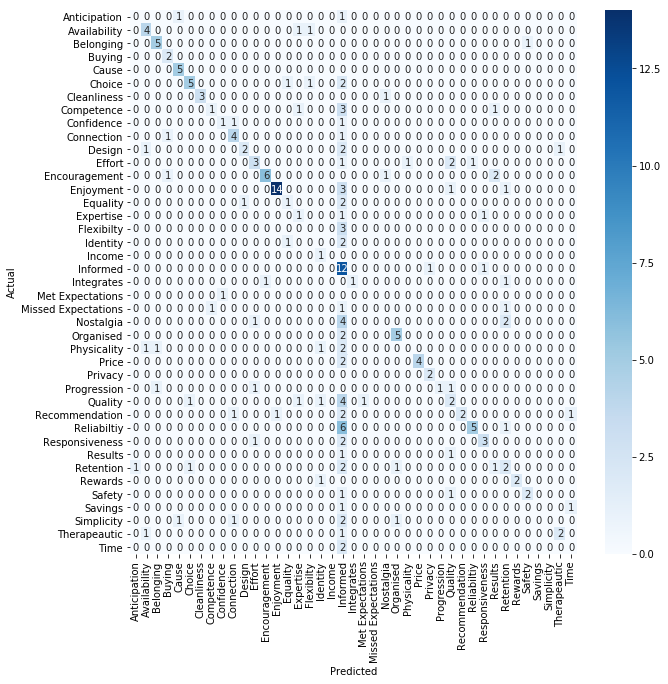

,Text,Predicted Label,Actual Label
914,"long waiting times, lack of response to",Effort,Responsiveness
313,"simplified the process, made it easier",Effort,Effort
694,it was well organised,Organised,Organised
211,where you are in your fitness journey,Results,Competence
511,appeal to fashionistas,Informed,Identity


In [0]:
pipe = make_pipeline(TfidfVectorizer(max_df=0.95, min_df=2,
                                     ngram_range=(1, 2),
                                     stop_words = 'english'),
                     LinearSVC())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

NoSamp = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(NoSamp,
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("NoSampleSVM.png",bbox_inches='tight')
files.download("NoSampleSVM.png")

df_comp_SVM_NoSam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_SVM_NoSam.Text = x_test
df_comp_SVM_NoSam['Predicted Label'] = y_pred
df_comp_SVM_NoSam['Actual Label'] = y_test
df_comp_SVM_NoSam.sample(5)

# Random Over Sampling Test

### Naive Bayes RandomOverSampling Using TF-IDF

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/imblearn/metrics/_classification.py:243: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples.
  average, warn_for)


                             pre       rec       spe        f1       geo       iba       sup

         Anticipation       0.02      0.50      0.75      0.03      0.61      0.36         2
         Availability       0.50      0.33      0.99      0.40      0.57      0.31         6
            Belonging       1.00      0.50      1.00      0.67      0.71      0.48         6
               Buying       0.33      1.00      0.98      0.50      0.99      0.98         2
                Cause       0.80      0.80      1.00      0.80      0.89      0.78         5
               Choice       0.62      0.56      0.99      0.59      0.74      0.52         9
          Cleanliness       1.00      0.75      1.00      0.86      0.87      0.73         4
           Competence       0.00      0.00      1.00      0.00      0.00      0.00         6
           Confidence       0.50      0.33      1.00      0.40      0.58      0.31         3
           Connection       0.50      0.67      0.98      0.57      0

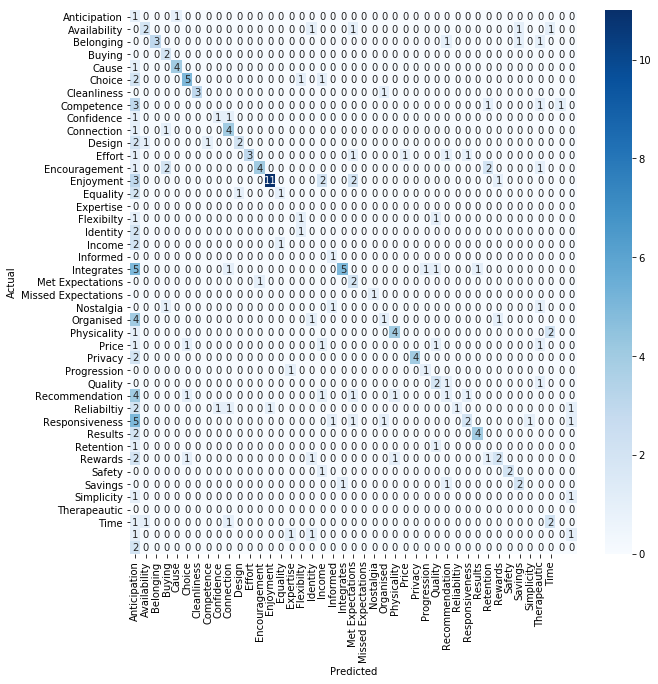

,Text,Predicted Label,Actual Label
267,an attractive building,Design,Design
480,professional coaches,Expertise,Expertise
225,reassured me i was nervous i initially felt a ...,Connection,Confidence
980,would run again,Organised,Retention
123,i didnt receive the full sponsorship,Cause,Cause


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomOverSampler(random_state=7569),
                         MultinomialNB())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

ROSSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(ROSSamp, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomOverSampleNB.png",bbox_inches='tight')
files.download("RandomOverSampleNB.png") 

df_comp_NB_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_NB_Sam.Text = x_test
df_comp_NB_Sam['Predicted Label'] = y_pred
df_comp_NB_Sam['Actual Label'] = y_test
df_comp_NB_Sam.sample(5)

### Random Forest Random Sampling

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/imblearn/metrics/_classification.py:243: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples.
  average, warn_for)


                             pre       rec       spe        f1       geo       iba       sup

         Anticipation       0.00      0.00      0.99      0.00      0.00      0.00         2
         Availability       0.33      0.17      0.99      0.22      0.41      0.15         6
            Belonging       0.50      0.50      0.99      0.50      0.70      0.47         6
               Buying       0.40      1.00      0.99      0.57      0.99      0.99         2
                Cause       0.67      0.40      1.00      0.50      0.63      0.37         5
               Choice       1.00      0.33      1.00      0.50      0.58      0.31         9
          Cleanliness       1.00      0.75      1.00      0.86      0.87      0.73         4
           Competence       0.50      0.17      1.00      0.25      0.41      0.15         6
           Confidence       1.00      0.33      1.00      0.50      0.58      0.31         3
           Connection       0.03      0.83      0.36      0.07      0

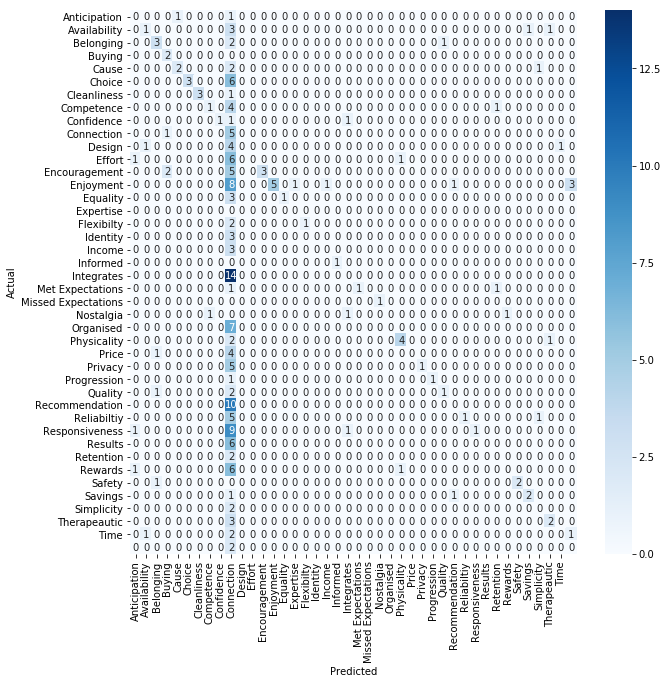

,Text,Predicted Label,Actual Label
585,a brief description of,Connection,Informed
740,it is worth the price,Price,Price
568,changes to terms and conditions,Connection,Informed
332,very motivating and encouraging,Encouragement,Encouragement
723,plenty of movement,Connection,Physicality


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomOverSampler(random_state=7569),
                         RandomForestClassifier(n_estimators=200, max_depth=5, random_state=7569))

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

ROSSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(ROSSamp, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomOverSampleRF.png",bbox_inches='tight')
files.download("RandomOverSampleRF.png") 

df_comp_RF_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_RF_Sam.Text = x_test
df_comp_RF_Sam['Predicted Label'] = y_pred
df_comp_RF_Sam['Actual Label'] = y_test
df_comp_RF_Sam.sample(5)

### SVM Random Sampling

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/imblearn/metrics/_classification.py:243: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples.
  average, warn_for)


                           pre       rec       spe        f1       geo       iba       sup

       Anticipation       0.00      0.00      0.98      0.00      0.00      0.00         2
       Availability       0.80      0.67      1.00      0.73      0.81      0.64         6
          Belonging       0.67      0.67      0.99      0.67      0.81      0.64         6
             Buying       0.50      1.00      0.99      0.67      1.00      0.99         2
              Cause       0.83      1.00      1.00      0.91      1.00      1.00         5
             Choice       0.62      0.56      0.99      0.59      0.74      0.52         9
        Cleanliness       1.00      0.75      1.00      0.86      0.87      0.73         4
         Competence       0.00      0.00      1.00      0.00      0.00      0.00         6
         Confidence       1.00      0.33      1.00      0.50      0.58      0.31         3
         Connection       0.50      0.67      0.98      0.57      0.81      0.63         

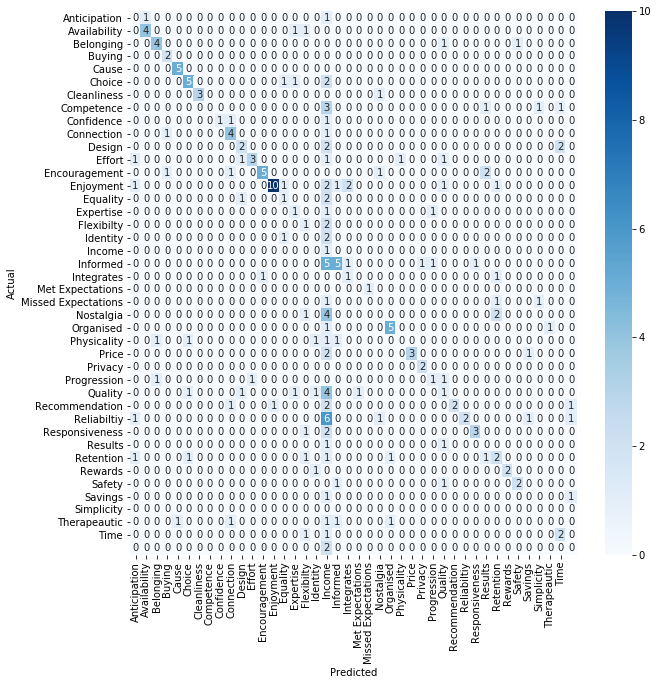

,Text,Predicted Label,Actual Label
979,we would not choose that venue again,Choice,Retention
626,plan my week in advance,Retention,Integrates
688,it was not organised well,Organised,Organised
540,to hear more about,Income,Informed
458,not disadvantaged by,Income,Equality


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomOverSampler(random_state=7569),
                         LinearSVC())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

ROSSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(ROSSamp, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomOverSampleSVM.png",bbox_inches='tight')
files.download("RandomOverSampleSVM.png")

df_comp_SVM_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_SVM_Sam.Text = x_test
df_comp_SVM_Sam['Predicted Label'] = y_pred
df_comp_SVM_Sam['Actual Label'] = y_test
df_comp_SVM_Sam.sample(5)
 

# SMOTE Sampling Test

### SMOTE Naive Bayes

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                           pre       rec       spe        f1       geo       iba       sup

       Anticipation       0.02      0.50      0.75      0.03      0.61      0.37         2
       Availability       0.50      0.33      0.99      0.40      0.57      0.31         6
          Belonging       0.50      0.50      0.99      0.50      0.70      0.47         6
             Buying       0.50      1.00      0.99      0.67      1.00      0.99         2
              Cause       0.40      0.40      0.99      0.40      0.63      0.37         5
             Choice       0.62      0.56      0.99      0.59      0.74      0.52         9
        Cleanliness       1.00      1.00      1.00      1.00      1.00      1.00         4
         Competence       0.25      0.17      0.99      0.20      0.41      0.15         6
         Confidence       0.20      0.33      0.98      0.25      0.57      0.31         3
         Connection       0.40      0.33      0.99      0.36      0.57      0.31         

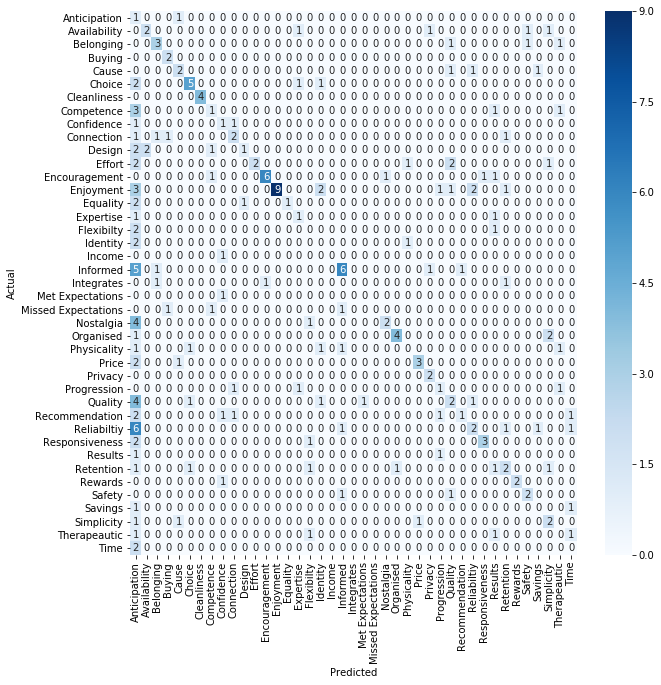

,Text,Predicted Label,Actual Label
225,reassured me i was nervous i initially felt a ...,Connection,Confidence
820,does not accept my card,Met expectations,Quality
641,definitely below standards,Buying,Missed expectations
757,can no longer afford the fees,Price,Price
341,help me stay positive during my training,Results,Encouragement


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         BorderlineSMOTE(random_state=7569),
                         MultinomialNB())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

ROSSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(ROSSamp, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("SMOTENB.png",bbox_inches='tight')
files.download("SMOTENB.png") 

df_comp_NB_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_NB_Sam.Text = x_test
df_comp_NB_Sam['Predicted Label'] = y_pred
df_comp_NB_Sam['Actual Label'] = y_test
df_comp_NB_Sam.sample(5)

### SMOTE RF

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                           pre       rec       spe        f1       geo       iba       sup

       Anticipation       0.00      0.00      0.99      0.00      0.00      0.00         2
       Availability       0.40      0.33      0.99      0.36      0.57      0.31         6
          Belonging       0.00      0.00      1.00      0.00      0.00      0.00         6
             Buying       0.67      1.00      1.00      0.80      1.00      1.00         2
              Cause       0.00      0.00      1.00      0.00      0.00      0.00         5
             Choice       1.00      0.11      1.00      0.20      0.33      0.10         9
        Cleanliness       1.00      0.50      1.00      0.67      0.71      0.48         4
         Competence       0.00      0.00      1.00      0.00      0.00      0.00         6
         Confidence       0.50      0.33      1.00      0.40      0.58      0.31         3
         Connection       0.50      0.33      0.99      0.40      0.57      0.31         

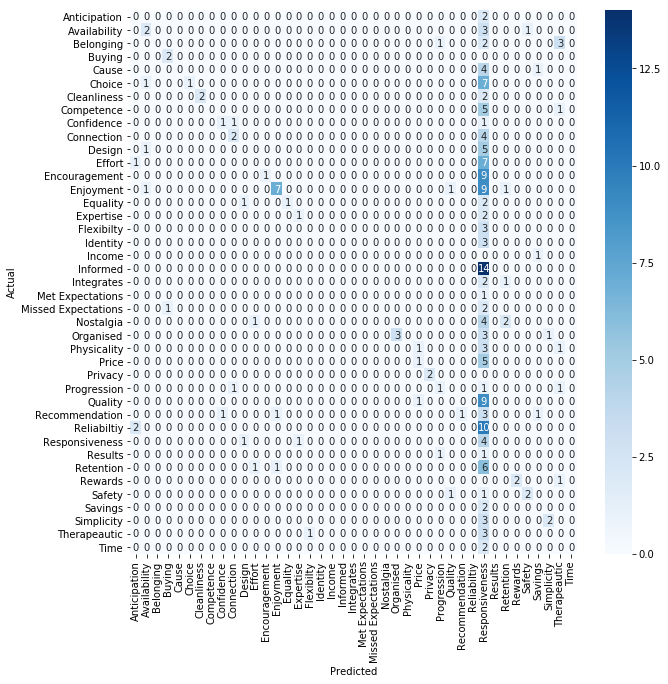

,Text,Predicted Label,Actual Label
248,has all ages taking part,Responsiveness,Connection
212,would not manage,Responsiveness,Competence
955,new personal best a pb,Progression,Results
1010,my first medal for,Rewards,Rewards
987,i will be doing it again next month,Responsiveness,Retention


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         BorderlineSMOTE(random_state=7569),
                         RandomForestClassifier(n_estimators=200, max_depth=5, random_state=7569))

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

ROSSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(ROSSamp, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("SMOTERF.png",bbox_inches='tight')
files.download("SMOTERF.png") 

df_comp_RF_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_RF_Sam.Text = x_test
df_comp_RF_Sam['Predicted Label'] = y_pred
df_comp_RF_Sam['Actual Label'] = y_test
df_comp_RF_Sam.sample(5)

### SMOTE SVM

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                           pre       rec       spe        f1       geo       iba       sup

       Anticipation       0.00      0.00      0.99      0.00      0.00      0.00         2
       Availability       0.80      0.67      1.00      0.73      0.81      0.64         6
          Belonging       1.00      0.50      1.00      0.67      0.71      0.48         6
             Buying       0.40      1.00      0.99      0.57      0.99      0.99         2
              Cause       0.67      0.80      0.99      0.73      0.89      0.78         5
             Choice       0.62      0.56      0.99      0.59      0.74      0.52         9
        Cleanliness       1.00      1.00      1.00      1.00      1.00      1.00         4
         Competence       0.06      0.50      0.77      0.10      0.62      0.37         6
         Confidence       0.33      0.33      0.99      0.33      0.57      0.31         3
         Connection       0.67      0.67      0.99      0.67      0.81      0.64         

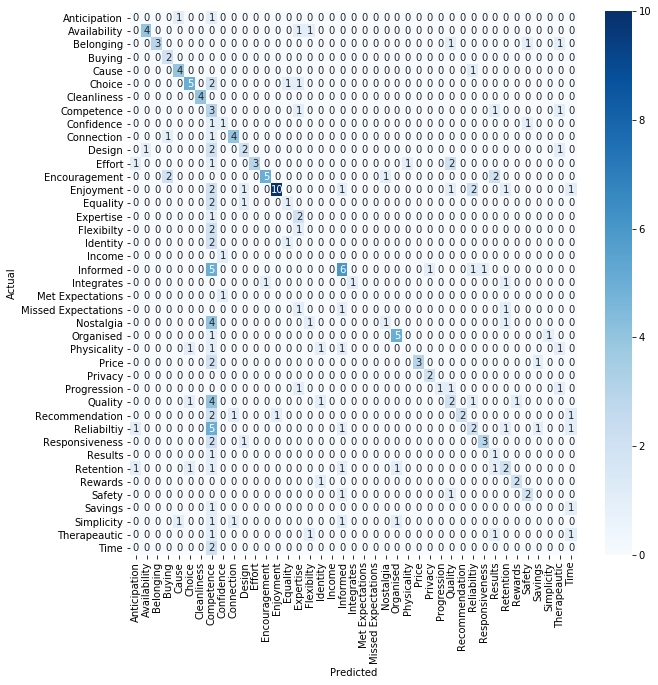

,Text,Predicted Label,Actual Label
584,the tour covered all the areas i was shown all...,Informed,Informed
366,enjoy the class,Enjoyment,Enjoyment
404,i loved it,Enjoyment,Enjoyment
340,always encouraging people to give it a try.,Encouragement,Encouragement
686,how it was organised upon arrival and during t...,Organised,Organised


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         BorderlineSMOTE(random_state=7569),
                         LinearSVC())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

ROSSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(ROSSamp, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("SMOTESVM.png",bbox_inches='tight')
files.download("SMOTESVM.png") 

df_comp_SVM_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_SVM_Sam.Text = x_test
df_comp_SVM_Sam['Predicted Label'] = y_pred
df_comp_SVM_Sam['Actual Label'] = y_test
df_comp_SVM_Sam.sample(5)

## RandomUnderSampling

### Naive Bayes RandomUnderSampling Using TF-IDF

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/imblearn/metrics/_classification.py:243: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples.
  average, warn_for)


                             pre       rec       spe        f1       geo       iba       sup

         Anticipation       0.02      0.50      0.74      0.03      0.61      0.36         2
         Availability       0.33      0.33      0.98      0.33      0.57      0.31         6
            Belonging       0.06      0.50      0.76      0.10      0.62      0.37         6
               Buying       1.00      1.00      1.00      1.00      1.00      1.00         2
                Cause       1.00      0.20      1.00      0.33      0.45      0.18         5
               Choice       1.00      0.11      1.00      0.20      0.33      0.10         9
          Cleanliness       1.00      0.50      1.00      0.67      0.71      0.48         4
           Competence       0.25      0.17      0.99      0.20      0.41      0.15         6
           Confidence       0.00      0.00      1.00      0.00      0.00      0.00         3
           Connection       0.17      0.17      0.98      0.17      0

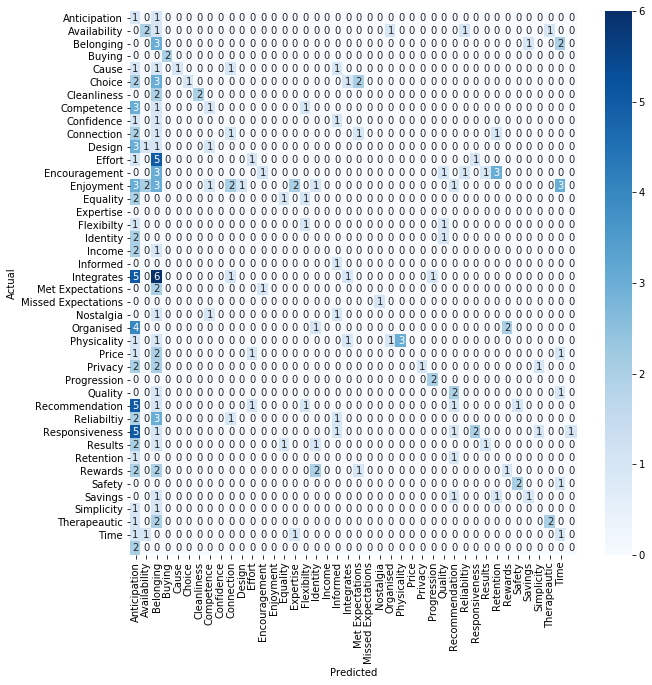

,Text,Predicted Label,Actual Label
889,the machine goes down.,Anticipation,Reliability
423,loved their time,Therapeutic,Enjoyment
1055,create a discount for returning customers,Anticipation,Savings
680,better admin would make it well run,Nostalgia,Organised
38,"opening hours. open the gym longer, stay open ...",Recommendation,Availability


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomUnderSampler(random_state=7569),
                         MultinomialNB())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

RUS_Mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(RUS_Mat, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomUnderSampleNB.png",bbox_inches='tight')
files.download("RandomUnderSampleNB.png") 

df_comp_NB_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_NB_Sam.Text = x_test
df_comp_NB_Sam['Predicted Label'] = y_pred
df_comp_NB_Sam['Actual Label'] = y_test
df_comp_NB_Sam.sample(5)

### Random Forest RandomUnderSampling Using TF-IDF

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/imblearn/metrics/_classification.py:243: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples.
  average, warn_for)


                             pre       rec       spe        f1       geo       iba       sup

         Anticipation       0.00      0.00      0.98      0.00      0.00      0.00         2
         Availability       0.33      0.33      0.98      0.33      0.57      0.31         6
            Belonging       0.00      0.00      1.00      0.00      0.00      0.00         6
               Buying       1.00      1.00      1.00      1.00      1.00      1.00         2
                Cause       1.00      0.20      1.00      0.33      0.45      0.18         5
               Choice       1.00      0.22      1.00      0.36      0.47      0.20         9
          Cleanliness       1.00      0.50      1.00      0.67      0.71      0.48         4
           Competence       0.33      0.17      0.99      0.22      0.41      0.15         6
           Confidence       0.00      0.00      1.00      0.00      0.00      0.00         3
           Connection       0.20      0.17      0.98      0.18      0

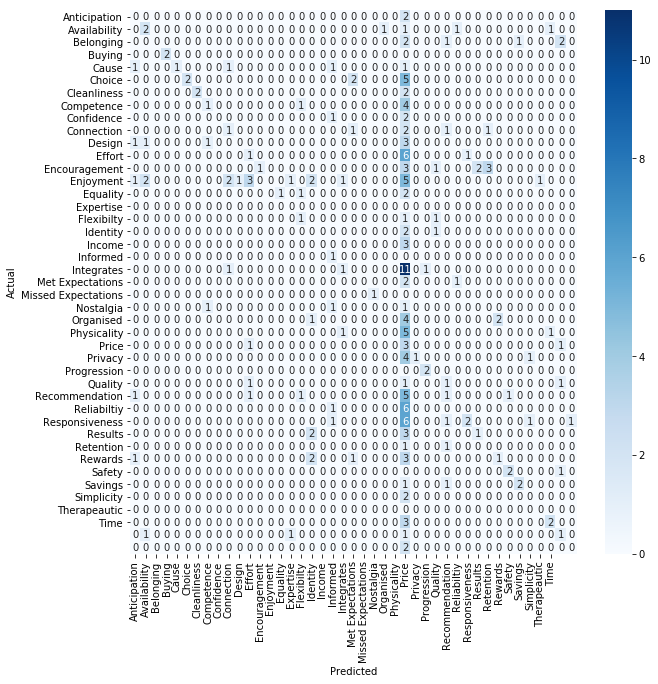

,Text,Predicted Label,Actual Label
339,good luck to everyone taking part today,Results,Encouragement
460,lack of discrimination,Expertise,Equality
306,is clunky and not always practical,Physicality,Effort
868,will it be reliable though,Physicality,Reliability
268,salubrious surroundings,Physicality,Design


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomUnderSampler(random_state=7569),
                         RandomForestClassifier(n_estimators=200, max_depth=5, random_state=7569))

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

RUS_Mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(RUS_Mat, 
            annot=True,
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomUnderSampleRF.png",bbox_inches='tight')
files.download("RandomUnderSampleRF.png") 

df_comp_RF_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_RF_Sam.Text = x_test
df_comp_RF_Sam['Predicted Label'] = y_pred
df_comp_RF_Sam['Actual Label'] = y_test
df_comp_RF_Sam.sample(5)

### SVM RandomUnderSampling Using TF-IDF

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/imblearn/metrics/_classification.py:243: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples.
  average, warn_for)


                             pre       rec       spe        f1       geo       iba       sup

         Anticipation       0.00      0.00      0.97      0.00      0.00      0.00         2
         Availability       0.33      0.33      0.98      0.33      0.57      0.31         6
            Belonging       0.50      0.17      1.00      0.25      0.41      0.15         6
               Buying       1.00      1.00      1.00      1.00      1.00      1.00         2
                Cause       1.00      0.20      1.00      0.33      0.45      0.18         5
               Choice       1.00      0.22      1.00      0.36      0.47      0.20         9
          Cleanliness       1.00      0.50      1.00      0.67      0.71      0.48         4
           Competence       0.25      0.17      0.99      0.20      0.41      0.15         6
           Confidence       0.00      0.00      1.00      0.00      0.00      0.00         3
           Connection       0.00      0.00      0.98      0.00      0

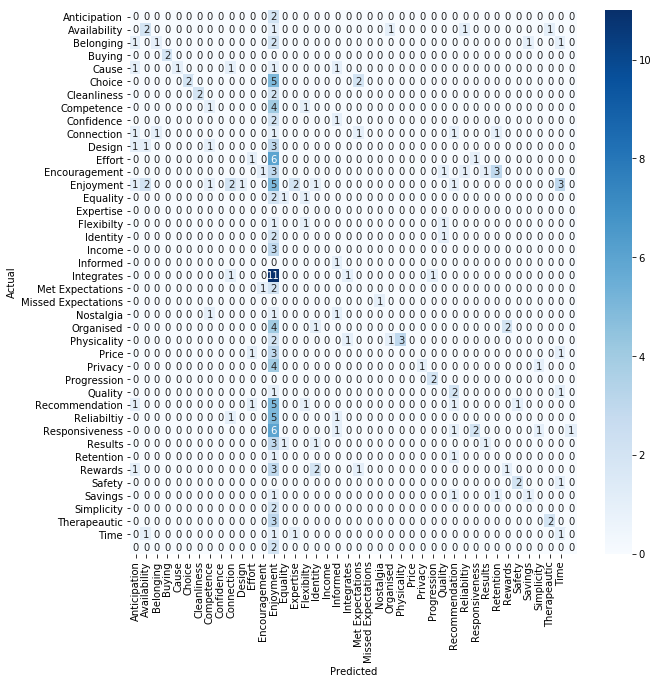

,Text,Predicted Label,Actual Label
485,someone tells me what to do,Enjoyment,Expertise
678,more structured activity,Enjoyment,Organised
543,minimal if any communication,Enjoyment,Informed
584,the tour covered all the areas i was shown all...,Enjoyment,Informed
654,i still have one from 1998,Enjoyment,Nostalgia


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomUnderSampler(random_state=7569),
                         LinearSVC())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

RUS_Mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(RUS_Mat,
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomUnderSampleSVM.png",bbox_inches='tight')
files.download("RandomUnderSampleSVM.png") 

df_comp_SVM_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_SVM_Sam.Text = x_test
df_comp_SVM_Sam['Predicted Label'] = y_pred
df_comp_SVM_Sam['Actual Label'] = y_test
df_comp_SVM_Sam.sample(5)